This is perhaps the simplest possible generative model

$$ x \sim \mathcal{N}(0,σ\ Ι)$$

$$ y_i \sim \mathcal{N}(x, I), i \in {1,\cdots,N}$$

We will observe $y_1, \cdots, y_N$ and try to infer $x$.

In [30]:
# Bayesian "mean" model

from pangolin import d, t, Given, I, IID, vmap, recurse, scan, sample, E, P, var, std, cov, corr, jags_code, makerv
from matplotlib import pyplot as plt
import numpy as np

def demo(ndata):
    σ = 3
    ndims = 2
    
    # manually generate data
    x_tru = σ * np.random.randn(2)
    y_obs = np.random.rand(ndata,ndims)+x_tru

    # define model
    x = d.mnorm_vcov(np.zeros(2),σ**2*np.eye(2))
    y = [d.mnorm(x,np.eye(2)) for i in range(ndata)]
    
    # do inference
    observations = [yi==yi_obs for (yi,yi_obs) in zip(y,y_obs)]
    xs = sample(x,Given(*observations))

    # plot
    plt.figure(figsize=(10,6))
    plt.plot(xs[:1000:10,0],xs[:1000:10,1],'rx',alpha=0.25,label='posterior samples ($x \sim p(x|y)$)');
    plt.plot(x_tru[0],x_tru[1],'kx',label='true x.',markersize=6)
    plt.plot(y_obs[:,0],y_obs[:,1],'b.',label='observed y');
    plt.legend()
    plt.xlim([-3*σ,3*σ])
    plt.ylim([-3*σ,3*σ]);
    plt.title(str(ndata) + " observation(s)")


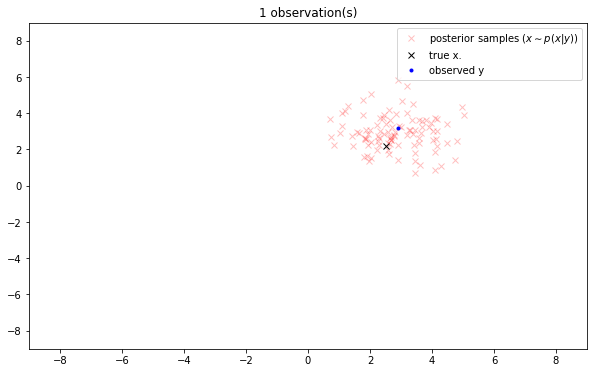

In [31]:
# with one observation the posterior is spread quite far out
demo(ndata=1)

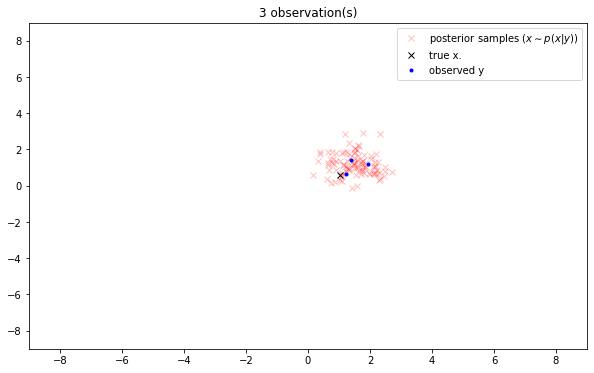

In [32]:
# with 3 observations it is smaller
demo(ndata=3)

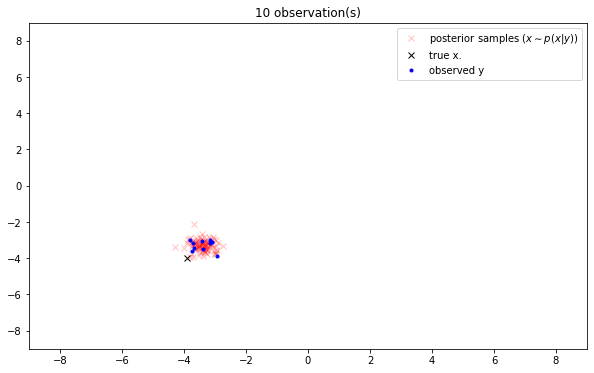

In [33]:
# with 10 observations is much smaller

demo(ndata=10)

In [34]:
# notice the uncertainty automatically shrinks in the right way so that it contains the true x